In [15]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib import rc
import os, sys

import astropy.constants as const
import astropy.units as u
from astropy.cosmology import z_at_value
from astropy.cosmology import WMAP9 as cosmo
from fractions import Fraction

import hasasia.sensitivity as hassens
import hasasia.sim as hassim
import hasasia.skymap as hassky

import gwent
import gwent.detector as detector
import gwent.binary as binary

In [16]:
rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Times New Roman'],'size':14})#,'weight':'bold'})

In [51]:
load_directory = gwent.__path__[0] + '/LoadFiles'

In [52]:
axissize = 14
labelsize = 16
legendsize = 12
figsize = (10,8)
colornorm = colors.Normalize(vmin=0.0, vmax=5.0)
linesize = 3

####################################################################
# Initialize different instruments

### aLIGO

In [53]:
Ground_T_obs = 4*u.yr

In [54]:
#aLIGO
aLIGO_filedirectory = load_directory + '/InstrumentFiles/aLIGO/StrainFiles/'
aLIGO_filename = 'aLIGODesign.txt'
aLIGO_filelocation = aLIGO_filedirectory + aLIGO_filename

aLIGO = detector.GroundBased('aLIGO',Ground_T_obs,load_location=aLIGO_filelocation,I_type='A')

### Einstein Telescope

In [21]:
#Einstein Telescope
ET_filedirectory = load_directory + '/InstrumentFiles/EinsteinTelescope/StrainFiles/'
ET_filename = 'ET_B_data.txt'
ET_filelocation = ET_filedirectory + ET_filename

ET = detector.GroundBased('ET',Ground_T_obs,load_location=ET_filelocation,I_type='A')

### Plots of Ground Detectors

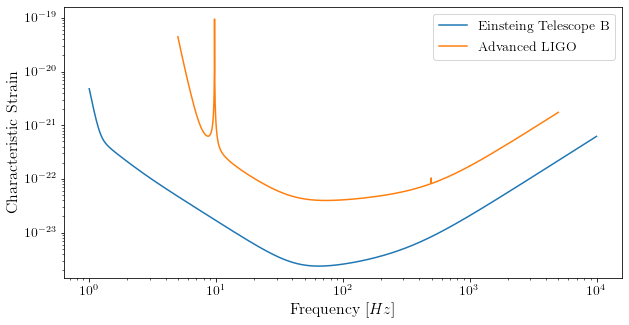

In [22]:
fig = plt.figure(figsize=(10,5))
plt.loglog(ET.fT,ET.h_n_f,label='Einsteing Telescope B')
plt.loglog(aLIGO.fT,aLIGO.h_n_f,label='Advanced LIGO')
plt.xlabel(r'Frequency $[Hz]$',fontsize = labelsize)
plt.ylabel('Characteristic Strain',fontsize = labelsize)
plt.legend()
plt.show()

### LISA Martin data

In [23]:
SpaceBased_T_obs = 4*u.yr

In [24]:
#Martin data
LISA_Other_filedirectory = load_directory + '/InstrumentFiles/LISA_Other/StrainFiles/'
LISA_Martin_filename = 'LISA_Allocation_S_h_tot.txt'
LISA_Martin_filelocation = LISA_Other_filedirectory + LISA_Martin_filename

#Should be ENSD
LISA_Martin = detector.SpaceBased('LISA_Martin',SpaceBased_T_obs,load_location=LISA_Martin_filelocation,I_type='E')

### LISA Neil Cornish data

In [25]:
#Neil Cornish data
LISA_Neil_filedirectory = load_directory + '/InstrumentFiles/LISA_Neil/StrainFiles/'
LISA_Neil_filename = 'LISA_sensitivity.txt'
LISA_Neil_filelocation = LISA_Neil_filedirectory + LISA_Neil_filename

#Should be ENSD
LISA_Neil = detector.SpaceBased('LISA_Neil',SpaceBased_T_obs,load_location=LISA_Neil_filelocation,I_type='E')

### LISA Larson Sensitivity Curve

In [26]:
#Larson Sensitivity Curve
LISA_Larson_filename = 'scg_6981.dat'
LISA_Larson_filelocation = LISA_Other_filedirectory + LISA_Larson_filename

#Should be ASD
LISA_Larson = detector.SpaceBased('LISA_Larson',SpaceBased_T_obs,load_location=LISA_Larson_filelocation,I_type='A')

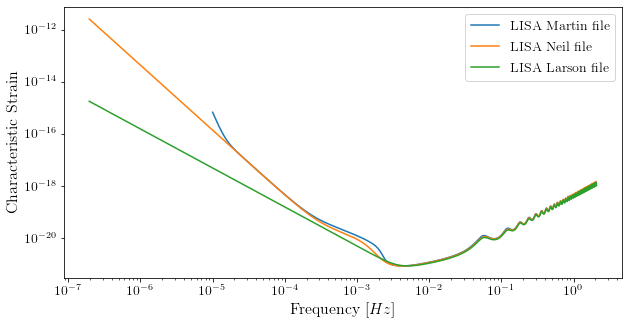

In [27]:
fig = plt.figure(figsize=(10,5))
plt.loglog(LISA_Martin.fT,LISA_Martin.h_n_f,label='LISA Martin file')
plt.loglog(LISA_Neil.fT,LISA_Neil.h_n_f,label='LISA Neil file')
plt.loglog(LISA_Larson.fT,LISA_Larson.h_n_f,label='LISA Larson file')
plt.xlabel(r'Frequency $[Hz]$',fontsize = labelsize)
plt.ylabel('Characteristic Strain',fontsize = labelsize)
plt.legend()
plt.show()

### NANOGrav continuous wave sensitivity

In [28]:
NANOGrav_filedirectory = load_directory + '/InstrumentFiles/NANOGrav/StrainFiles/' 

In [29]:
#NANOGrav continuous wave sensitivity
NANOGrav_background = 4e-16 # Unsubtracted GWB amplitude: 0,4e-16
NANOGrav_dp = 0.95 #Detection Probablility: 0.95,0.5
NANOGrav_fap = 0.0001 #False Alarm Probability: 0.05,0.003,0.001,0.0001
NANOGrav_Tobs = 15 #Observation years: 15,20,25

NANOGrav_filename = 'cw_simulation_Ared_' + str(NANOGrav_background) + '_dp_' + str(NANOGrav_dp) \
                    + '_fap_' + str(NANOGrav_fap) + '_T_' + str(NANOGrav_Tobs) + '.txt'
NANOGrav_filelocation = NANOGrav_filedirectory + NANOGrav_filename

NANOGrav_Mingarelli_no_GWB = detector.PTA('NANOGrav_Mingarelli_no_GWB',load_location=NANOGrav_filelocation)

In [30]:
#NANOGrav continuous wave sensitivity
NANOGrav_background_2 = 0 # Unsubtracted GWB amplitude: 0,4e-16
NANOGrav_dp_2 = 0.95 #Detection Probablility: 0.95,0.5
NANOGrav_fap_2 = 0.0001 #False Alarm Probability: 0.05,0.003,0.001,0.0001
NANOGrav_Tobs_2 = 15 #Observation years: 15,20,25

NANOGrav_filename_2 = 'cw_simulation_Ared_' + str(NANOGrav_background_2) + '_dp_' + str(NANOGrav_dp_2) \
                    + '_fap_' + str(NANOGrav_fap_2) + '_T_' + str(NANOGrav_Tobs_2) + '.txt'
NANOGrav_filelocation_2 = NANOGrav_filedirectory + NANOGrav_filename_2

NANOGrav_Mingarelli_GWB = detector.PTA('NANOGrav_Mingarelli_GWB',load_location=NANOGrav_filelocation_2)

### SKA  parameters and methods from arXiv:0804.4476 section 7.1

In [31]:
###############################################
#SKA calculation using parameters and methods from arXiv:0804.4476 section 7.1
sigma_SKA = 10*u.ns.to('s')*u.s #sigma_rms timing residuals in nanoseconds to seconds
T_SKA = 15*u.yr #Observing time in years
N_p_SKA = 20 #Number of pulsars
cadence_SKA = 1/(u.wk.to('yr')*u.yr) #Avg observation cadence of 1 every week in [number/yr]

In [32]:
SKA_Hazboun = detector.PTA('SKA_Hazboun',T_SKA,N_p_SKA,sigma_SKA,cadence_SKA)

In [33]:
SKA_Hazboun_wRN = detector.PTA('SKA_Hazboun_wRN',T_SKA,N_p_SKA,sigma_SKA,cadence_SKA,A_rn=[1e-16,1e-12],alpha_rn=[-3/4,1])

In [34]:
SKA_Hazboun_wGWB = detector.PTA('SKA_Hazboun_wGWB',T_SKA,N_p_SKA,sigma_SKA,cadence_SKA,A_GWB=4e-16)

#### Using Jeff's Methods/code https://arxiv.org/abs/1907.04341

### NANOGrav 11.5yr parameters https://arxiv.org/abs/1801.01837

In [35]:
###############################################
#NANOGrav calculation using 11.5yr parameters https://arxiv.org/abs/1801.01837
sigma_nano = 100*u.ns.to('s')*u.s #rms timing residuals in nanoseconds to seconds
T_nano = 15*u.yr #Observing time in years
N_p_nano = 18 #Number of pulsars
cadence_nano = 1/(2*u.wk.to('yr')*u.yr) #Avg observation cadence of 1 every 2 weeks in number/year

In [36]:
NANOGrav_Hazboun = detector.PTA('NANOGrav_Hazboun',T_nano,N_p_nano,sigma_nano,cadence_nano)

In [37]:
NANOGrav_Hazboun_wRN = detector.PTA('NANOGrav_Hazboun_wRN',T_nano,N_p_nano,sigma_nano,cadence_nano,A_rn=[1e-16,1e-12],alpha_rn=[-3/4,1])

In [38]:
NANOGrav_Hazboun_wGWB = detector.PTA('NANOGrav_Hazboun_wGWB',T_nano,N_p_nano,sigma_nano,cadence_nano,A_GWB=4e-16)

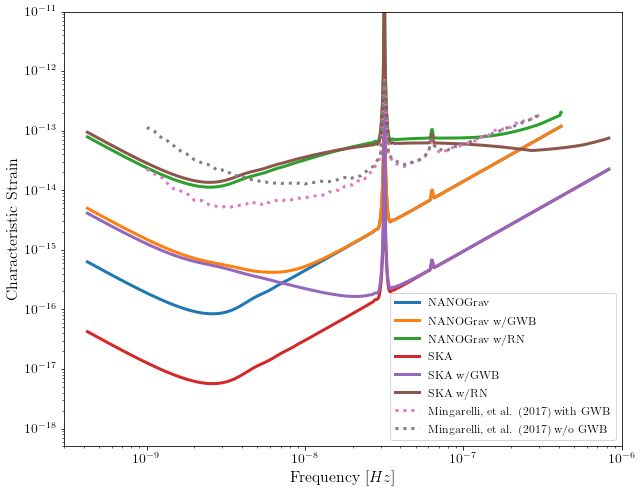

In [39]:
fig = plt.figure(figsize=(10,8))
plt.loglog(NANOGrav_Hazboun.fT,NANOGrav_Hazboun.h_n_f, linewidth = linesize,label = r'NANOGrav')
plt.loglog(NANOGrav_Hazboun_wGWB.fT,NANOGrav_Hazboun_wGWB.h_n_f, linewidth = linesize,label = r'NANOGrav w/GWB')
plt.loglog(NANOGrav_Hazboun_wRN.fT,NANOGrav_Hazboun_wRN.h_n_f, linewidth = linesize,label = r'NANOGrav w/RN')

plt.loglog(SKA_Hazboun.fT,SKA_Hazboun.h_n_f, linewidth = linesize,label = r'SKA')
plt.loglog(SKA_Hazboun_wGWB.fT,SKA_Hazboun_wGWB.h_n_f, linewidth = linesize,label = r'SKA w/GWB')
plt.loglog(SKA_Hazboun_wRN.fT,SKA_Hazboun_wRN.h_n_f, linewidth = linesize,label = r'SKA w/RN')

plt.loglog(NANOGrav_Mingarelli_GWB.fT,NANOGrav_Mingarelli_GWB.h_n_f,linestyle = ':', linewidth = linesize,\
           label = r'Mingarelli, et al. (2017) with GWB')
plt.loglog(NANOGrav_Mingarelli_no_GWB.fT,NANOGrav_Mingarelli_no_GWB.h_n_f,linestyle = ':', linewidth = linesize,\
           label = r'Mingarelli, et al. (2017) w/o GWB')

plt.tick_params(axis = 'both',which = 'major', labelsize = axissize)
plt.ylim([5e-19,1e-11])
plt.xlim([3e-10,1e-6])
#plt.title('NANOGrav (15yr)',fontsize=labelsize)
plt.xlabel(r'Frequency $[Hz]$',fontsize = labelsize)
plt.ylabel('Characteristic Strain',fontsize = labelsize)
plt.legend(loc='lower right', fontsize = 12)
plt.show()

####################################################################
# Calculate LISA amplitude spectral densities for various models

In [40]:
L = 2.5*u.Gm  #armlength in Gm
L = L.to('m')
LISA_T_obs = 4*u.yr

### LISA Calculation from https://arxiv.org/pdf/1702.00786.pdf (Amaro-Seaone 2017)

In [41]:
f_acc_break_low = .4*u.mHz.to('Hz')*u.Hz
f_acc_break_high = 8.*u.mHz.to('Hz')*u.Hz
f_IMS_break = 2.*u.mHz.to('Hz')*u.Hz
A_acc = 3e-15*u.m/u.s/u.s
A_IMS = 10e-12*u.m

Background = False

ESA_LISA = detector.SpaceBased('ESA_LISA',\
                          LISA_T_obs,L,A_acc,f_acc_break_low,f_acc_break_high,A_IMS,f_IMS_break,\
                          Background=Background)

### Neil Calculation from https://arxiv.org/pdf/1803.01944.pdf

In [42]:
#Neil Calculation from https://arxiv.org/pdf/1803.01944.pdf
f_acc_break_low = .4*u.mHz.to('Hz')*u.Hz
f_acc_break_high = 8.*u.mHz.to('Hz')*u.Hz
f_IMS_break = 2.*u.mHz.to('Hz')*u.Hz
A_acc = 3e-15*u.m/u.s/u.s
A_IMS = 1.5e-11*u.m
Background = False
    
Neil_LISA = detector.SpaceBased('Neil_LISA',\
                           LISA_T_obs,L,A_acc,f_acc_break_low,f_acc_break_high,A_IMS,f_IMS_break,\
                           Background=Background)

### Plots of Space-Based Detectors

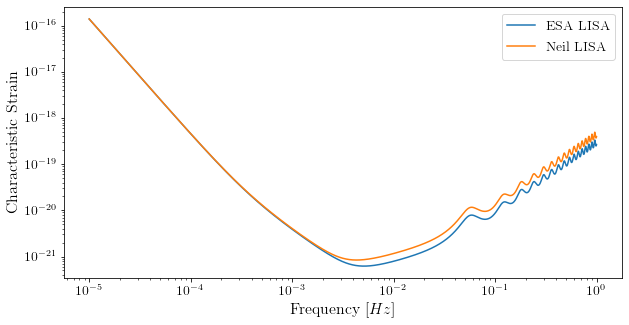

In [43]:
fig = plt.figure(figsize=(10,5))
plt.loglog(ESA_LISA.fT,ESA_LISA.h_n_f,label='ESA LISA')
plt.loglog(Neil_LISA.fT,Neil_LISA.h_n_f,label='Neil LISA')
#plt.loglog(LISA_Martin.fT,LISA_Martin.h_n_f,label='LISA Martin file')
#plt.loglog(LISA_Neil.fT,LISA_Neil.h_n_f,label='LISA Neil file')
#plt.loglog(LISA_Larson.fT,LISA_Larson.h_n_f,label='LISA Larson file')
plt.xlabel(r'Frequency $[Hz]$',fontsize = labelsize)
plt.ylabel('Characteristic Strain',fontsize = labelsize)
plt.legend()
plt.show()

#######################################################################
# BBH strain calculation

In [72]:
#Vars = [M,q,chi1,chi2,z]
M = [1e6,65.0,1e10]
q = [1.0,18.0,1.0]
x1 = [0.95,0.0,-0.95]
x2 = [0.95,0.0,-0.95]
z = [3.0,0.093,20.0]
inc = 0.0 #Doesn't really work...

Vars1 = [M[0],q[0],x1[0],x2[0],z[0]]
Vars2 = [M[1],q[1],x1[1],x2[1],z[1]]
Vars3 = [M[2],q[2],x1[2],x2[2],z[2]]
Vars4 = [M[1],q[0],x1[1],x2[1],z[1]]

In [73]:
source_1 = binary.BBHFrequencyDomain(M[0],q[0],z[0],x1[0],x2[0],inc,instrument=ESA_LISA)

In [74]:
print(len(source_1._phenomD_f))
print(len(source_1._phenomD_h))

AttributeError: 'BBHFrequencyDomain' object has no attribute '_phenomD_f'

In [75]:
source_2 = binary.BBHFrequencyDomain(M[1],q[1],z[1],x1[1],x2[1],inc,instrument=aLIGO)

In [76]:
print(len(source_2._phenomD_f))
print(len(source_2._phenomD_h))

AttributeError: 'BBHFrequencyDomain' object has no attribute '_phenomD_f'

In [77]:
source_3 = binary.BBHFrequencyDomain(M[2],q[2],z[2],x1[2],x2[2],inc,instrument=SKA_Hazboun)

In [78]:
print(len(source_3._phenomD_f))
print(len(source_3._phenomD_h))

AttributeError: 'BBHFrequencyDomain' object has no attribute '_phenomD_f'

In [79]:
source_4 = binary.BBHFrequencyDomain(M[1],q[0],z[1],x1[1],x2[1],inc,instrument=ET)

In [80]:
print(len(source_4._phenomD_f))
print(len(source_4._phenomD_h))

AttributeError: 'BBHFrequencyDomain' object has no attribute '_phenomD_f'

### Numerical Relativity from EOB subtraction

In [55]:
EOBdiff_filedirectory = load_directory + '/DiffStrain/EOBdiff/'
diff0002 = binary.BBHTimeDomain(M[1],q[0],z[1],load_location=EOBdiff_filedirectory+'diff0002.dat')
diff0114 = binary.BBHTimeDomain(M[1],q[0],z[1],load_location=EOBdiff_filedirectory+'diff0114.dat')
diff0178 = binary.BBHTimeDomain(M[1],q[0],z[1],load_location=EOBdiff_filedirectory+'diff0178.dat')
diff0261 = binary.BBHTimeDomain(M[1],q[0],z[1],load_location=EOBdiff_filedirectory+'diff0261.dat')
diff0303 = binary.BBHTimeDomain(M[1],q[0],z[1],load_location=EOBdiff_filedirectory+'diff0303.dat')

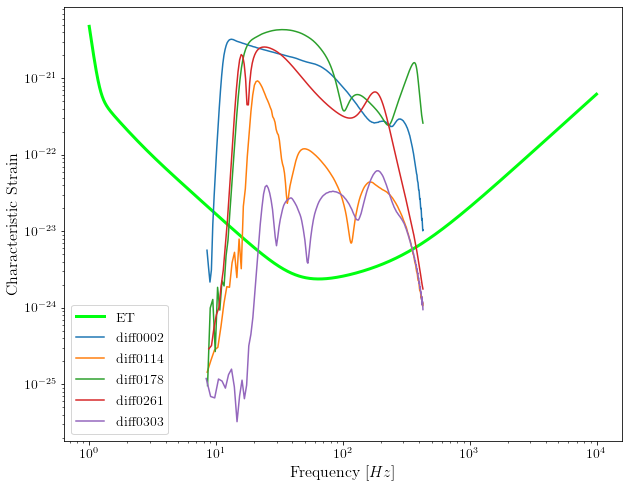

In [56]:
fig,ax = plt.subplots(figsize = figsize)
plt.loglog(ET.fT,ET.h_n_f, linewidth = linesize,color = cm.hsv(colornorm(1.75)),label = 'ET')
plt.loglog(diff0002.f,binary.Get_Char_Strain(diff0002),label = 'diff0002')
plt.loglog(diff0114.f,binary.Get_Char_Strain(diff0114),label = 'diff0114')
plt.loglog(diff0178.f,binary.Get_Char_Strain(diff0178),label = 'diff0178')
plt.loglog(diff0261.f,binary.Get_Char_Strain(diff0261),label = 'diff0261')
plt.loglog(diff0303.f,binary.Get_Char_Strain(diff0303),label = 'diff0303')
plt.xlabel(r'Frequency $[Hz]$',fontsize = labelsize)
plt.ylabel('Characteristic Strain',fontsize = labelsize)
plt.legend()
plt.show()

/Users/andrewkaiser/anaconda3/envs/gwent/lib/python3.7/site-packages/gwent/waveform.py:351: RuntimeWarning: invalid value encountered in sqrt
  f_max = np.abs(f_RD+f_damp*Gammas[2]*(np.sqrt(1-Gammas[1]**2)-1)/Gammas[1])


ValueError: operands could not be broadcast together with shapes (1000,) (1792,) 

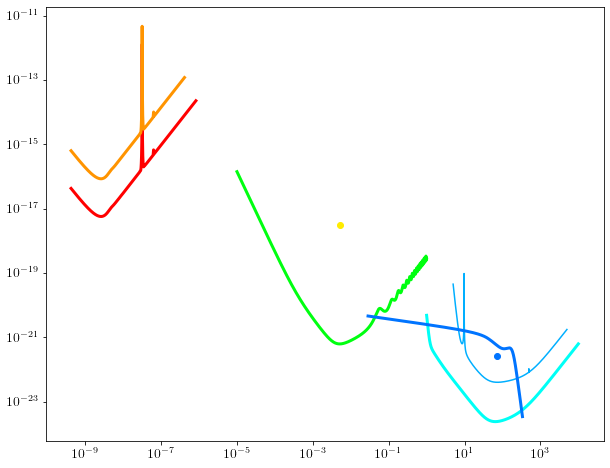

In [64]:
fig,ax = plt.subplots(figsize = figsize)
#plt.loglog(NANOGrav_f,NANOGrav_h_f)
ax.loglog(SKA_Hazboun.fT,SKA_Hazboun.h_n_f, linewidth = linesize,color = cm.hsv(colornorm(0.0)),label = 'IPTA ~2030s')
ax.loglog(NANOGrav_Hazboun.fT,NANOGrav_Hazboun.h_n_f, linewidth = linesize,color = cm.hsv(colornorm(0.5)),\
          label = 'NANOGrav (15yr)')
ax.loglog(ESA_LISA.fT,ESA_LISA.h_n_f, linewidth = linesize,color = cm.hsv(colornorm(1.75)),label = 'LISA')
ax.loglog(aLIGO.fT,aLIGO.h_n_f,color = cm.hsv(colornorm(2.8)),label = 'aLIGO')
ax.loglog(ET.fT,ET.h_n_f, linewidth = linesize,color = cm.hsv(colornorm(2.5)),label = 'Einstein Telescope')

ax.loglog(source_1.f,binary.Get_Char_Strain(source_1), linewidth = linesize,color = cm.hsv(colornorm(0.8)),\
          label = r'$M = %.1e$ $M_{\odot}$, $q = %.1f$, $z = %.1f$, $\chi_{i} = %.2f$' %(M[0],q[0],z[0],x1[0]))
ax.scatter(source_1.instrument.f_opt,source_1.h_gw,color = cm.hsv(colornorm(0.8)))

ax.loglog(source_2.f,binary.Get_Char_Strain(source_2), linewidth = linesize,color = cm.hsv(colornorm(3.0)),\
          label = r'$M = %.1e$ $M_{\odot}$, $q = %.1f$, $z = %.1f$, $\chi_{i} = %.0f$' %(M[1],q[1],z[1],x1[1]))
ax.scatter(source_2.instrument.f_opt,source_2.h_gw,color = cm.hsv(colornorm(3.0)))

ax.loglog(source_3.f,binary.Get_Char_Strain(source_3), linewidth = linesize,color = cm.hsv(colornorm(4.5)),\
          label = r'$M = %.1e$ $M_{\odot}$, $q = %.1f$, $z = %.1f$, $\chi_{i} = %.2f$' %(M[2],q[2],z[2],x1[2]))
ax.scatter(source_3.instrument.f_opt,source_3.h_gw,color = cm.hsv(colornorm(4.5)))


ax.set_xlim([1e-10, 1e4])
ax.set_ylim([1e-24, 1e-11])
ax.tick_params(axis = 'both',which = 'major', labelsize = axissize)

ax.set_xlabel(r'Frequency $[Hz]$',fontsize = labelsize)
ax.set_ylabel('Characteristic Strain',fontsize = labelsize)
ax.legend(loc='upper right', fontsize = legendsize)
plt.show()